In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('onlinefraud.csv')
df = data.copy()

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# 1. Exploratory Data Analysis

## Dataset:
- The dataset includes features like transaction type, amount, sender and recipient balances before and after the transaction, and a label indicating whether the transaction was fraudulent.
[Kaggle](https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection).



## Basic Checklist

### Shape Analysis:
- **Target variable**  : isFraud
- **Rows and columns**  :6362619,11
- **Variable types**:   Quantitative: 5, Qualitative: 6, (isFlaggedFraud won't be use in the train process)
- **Missing values analysis**  
  -  there are no missing values there are replace by 0.0
  -  



### Content Analysis:
- **Target visualization**:
    -  Fraud 0.13% (8213/6362619) (unbalanced)
    -  potential overfitting


- **Meaning of variables**:
    -  most  continuous variables have their distribution is heavily right-skewed. Most values are concentrated near 0, with a massive peak (around 3.5 million occurrences) for balances close to 0.
    -  for the amount variable : The distribution is bimodal, with two distinct peaks: one around 5 and another around 13.5.
    This suggests that the transaction amounts cluster around two main values, indicating two distinct groups in the data.
    - there is only one qualitative variable which type. The chart for type  shows that transactions are mostly PAYMENT and CASH_OUT, followed by CASH_IN, with few TRANSFER and DEBIT. This reflects typical behavior in a financial dataset, where payments and withdrawals are frequent.

- **Relationship between variables and target**:
    - Target / origineBalance :  Before the transaction (oldbalanceOrg): Fraudulent accounts tend to have higher initial balances (peaks at 1,807 and 268,336), while non-fraudulent accounts mostly start at 0.
    After the transaction (newbalanceOrig): Both types of transactions often result in emptied accounts (peak at 0), but fraudulent accounts sometimes retain a non-zero balance, unlike non-fraudulent accounts which are almost always emptied.
    Key difference: Fraudsters target accounts with higher initial balances but don’t always empty them completely, whereas non-fraudulent transactions often originate from low-balance accounts and systematically empty them
    -  Target / destinationBalance : Before the transaction (oldbalanceDest): The recipient accounts of non-fraudulent transactions mostly have an initial balance of 0, whereas those involved in fraudulent transactions tend to have higher initial balances (around 22,025).
    After the transaction (newbalanceDest): Recipient accounts in fraudulent transactions accumulate much higher balances (around 162,753), while non-fraudulent accounts often remain at 0 or reach more modest balances (around 36,314).
    Key difference: Fraudulent transactions significantly increase the balances of recipient accounts, suggesting that fraudsters transfer money to accounts that accumulate funds (possibly for later withdrawal). Non-fraudulent transactions typically involve accounts that remain at 0 or accumulate smaller amounts.
    -  Target / amount : Non-fraud: Non-fraudulent transactions show two main groups of amounts: small amounts (147.41) and very large amounts (729,415.53).
    Fraud: Fraudulent transactions also include small amounts (147.41), but their second group is more modest (268,336), indicating that fraudsters often carry out medium to high-value transactions, but not as large as the biggest non-fraudulent ones (729,415.53).
    Key insight: Fraudulent transactions tend to avoid extremely large amounts (like 729,415.53), possibly to avoid triggering security alerts or because the targeted accounts don’t have such high balances.
    - Target / type :on-fraud:
    Non-fraudulent transactions are dominated by PAYMENT (0.693) and CASH_OUT (1.386), followed by CASH_IN (1.792).
    This matches the previous pie chart, where PAYMENT and CASH_OUT were the most frequent categories (30–40% each), followed by CASH_IN (20–25%).
    There are very few TRANSFER and DEBIT transactions, which aligns with their low representation in the pie chart.
    Fraud:
    Fraudulent transactions are almost exclusively TRANSFER (1.099) and CASH_OUT (1.386).
    This confirms that fraudsters primarily use transfers to move funds, often followed by cash-outs to withdraw the money.
    There are virtually no PAYMENT, DEBIT, or CASH_IN transactions in fraud cases, which makes sense—fraudsters aren’t looking to make legitimate payments or deposits, but rather to steal and extract funds.

    - Target / step : Non-fraud:
    Non-fraudulent transactions occur at various times, with a notable concentration around 2 AM and a larger peak at 5 AM. This suggests that legitimate transactions happen at diverse times but show increased activity after 5 AM—possibly a busy period, such as the end of a business day.
    Fraud:
    Fraudulent transactions are mostly concentrated between 5 and 6 AM, with a later peak than non-fraudulent transactions. This indicates that fraudsters prefer to act at specific times, possibly to take advantage of periods with lower monitoring (e.g., nighttime or outside working hours).
    The low density of fraudulent transactions before 4 AM suggests that fraudsters avoid the early hours, possibly to reduce the risk of immediate detection.




## More Detailed Analysis

- **Relationship between variables**:
    -  amount / origineBalance  : Fraud:
    Fraudulent transactions originate from accounts with significant initial balances (oldbalanceOrg ≈ amount, often 1,807 or 268,336) and almost always empty the accounts (newbalanceOrig = 0).
    This reflects the behavior of fraudulent TRANSFER and CASH_OUT transactions, where fraudsters transfer and withdraw the entire available balance.
    Non-fraud:
    Non-fraudulent transactions often start from accounts with low or zero initial balances and also end with zero balance (newbalanceOrig = 0), which is consistent with normal PAYMENT and CASH_OUT behavior.
    Some non-fraudulent transactions involve high amounts (729,415.53), but these are rare.

    -  amount / destinationBalance : Fraudulent transactions involve recipient accounts whose initial balance (oldbalanceDest) and final balance (newbalanceDest) are often equal to the transferred amount (amount, around 162,753 or 268,336).
    This reflects the behavior of fraudulent TRANSFER operations, where funds are sent to mule or temporary accounts, directly increasing their balance.
    Non-fraud:
    Non-fraudulent transactions mostly involve recipient accounts with low or zero initial balances, and their final balances are either 0 (for PAYMENT or CASH_OUT) or moderate (36,314, for CASH_IN).
    Some non-fraudulent recipient accounts have high initial and final balances (up to 1,081,088), likely representing merchant or institutional accounts.
    -  
    -  
    -  
    -  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [22]:
#df.dtypes.value_counts()
df['isFraud'].isna().value_counts()

isFraud
False    6362620
Name: count, dtype: int64

In [7]:
df.isna().value_counts()
# plt.figure()
# sns.heatmap(df.isna(), cbar=False)

step   type   amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
False  False  False   False     False          False           False     False           False           False    False             6362620
Name: count, dtype: int64

## Content Analysis

### Initial Visualization - Elimination of Unnecessary Columns

In [8]:
df = df.drop(['nameOrig','nameDest', 'isFlaggedFraud'], axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


### Examination of the Target Column

In [9]:
target= df['isFraud'].value_counts()
target

isFraud
0    6354407
1       8213
Name: count, dtype: int64

### Histograms of Continuous Variables

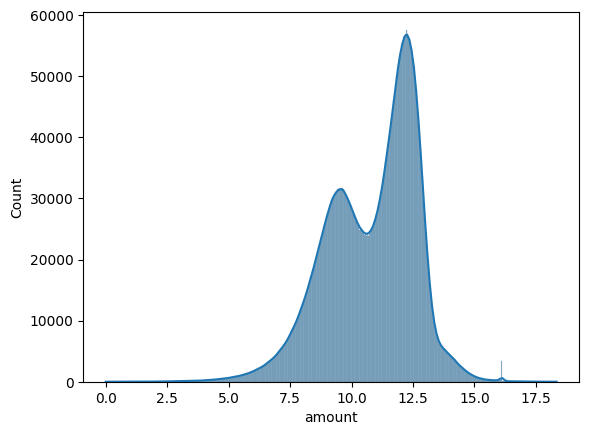

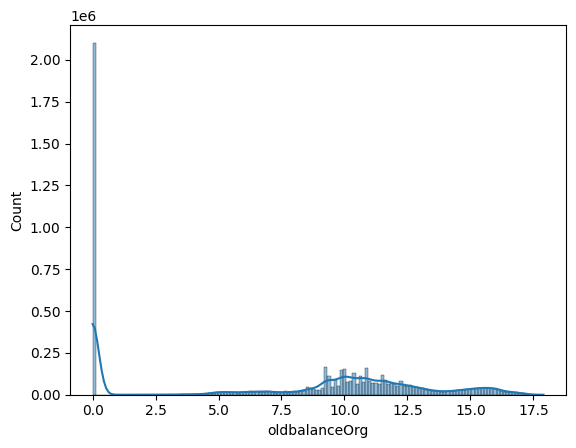

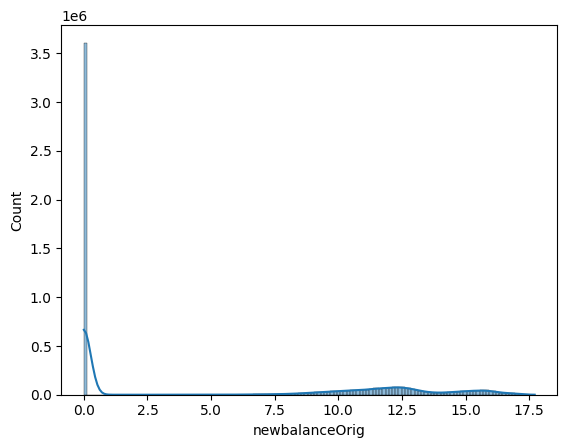

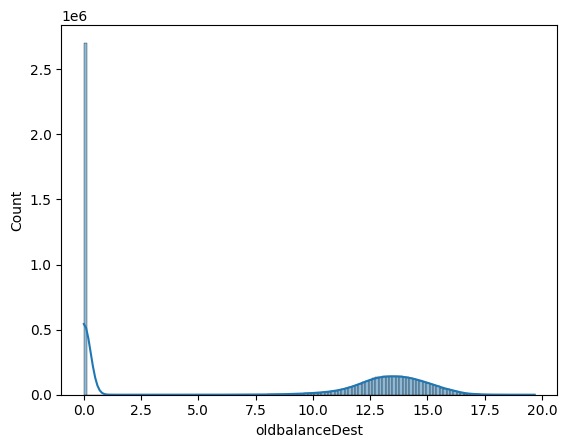

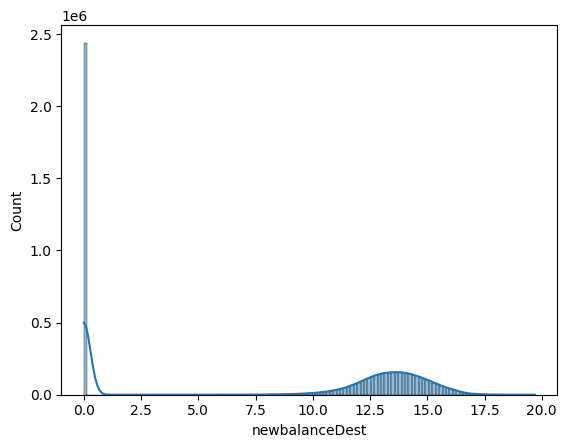

In [10]:
for col in df.select_dtypes('float'):
    plt.figure()
    df_log = np.log1p(df[col])
    sns.histplot(df_log , kde=True, )
    plt.show()

### Variables Qualitatives

In [11]:
for col in df.select_dtypes('object'):
    print(f'{col :-<35} {df[col].unique()}')

type------------------------------- ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


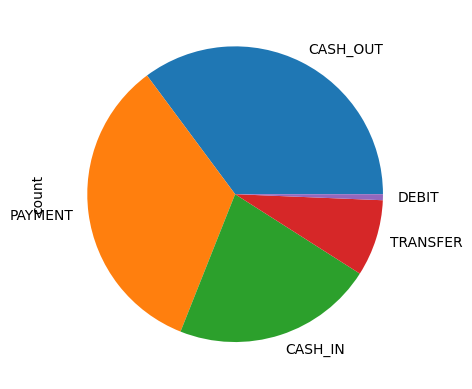

In [12]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

## Relationship Between Target / Variables

### Creation of Fraud and Non-Fraud Subsets


In [13]:
fraud = df[df['isFraud'] == 1]
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1
3,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1
251,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1
252,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1
680,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1


In [14]:
nonfraud =  df[df['isFraud'] == 0]
nonfraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0
6,1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0


### Création des ensembles origineBalance et DestinationBalance

In [15]:
origineBalance_columns = ['oldbalanceOrg', 'newbalanceOrig']
destinationBalance_columns = ['oldbalanceDest', 'newbalanceDest']


## Target / origineBalance

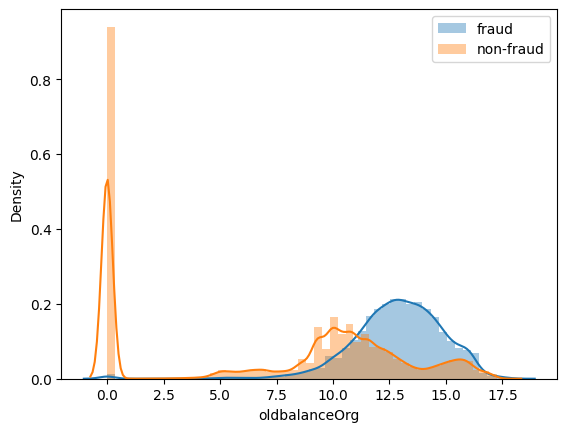

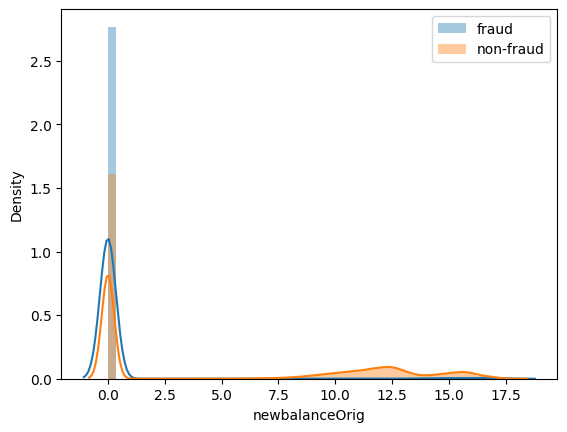

In [16]:
for col in origineBalance_columns:
    plt.figure()
    fraud_log = np.log1p(fraud[col])
    sns.distplot(fraud_log, label='fraud',  kde=True)
    nonfraud_log = np.log1p(nonfraud[col])
    sns.distplot(nonfraud_log, label='non-fraud',  kde=True)
    plt.legend()

## Target / DestinationBalance

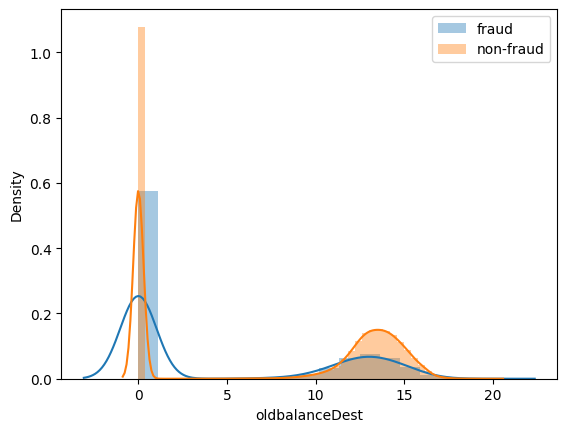

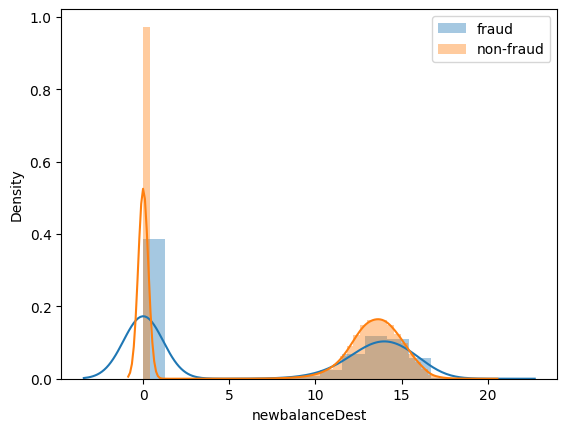

In [17]:
for col in destinationBalance_columns:
    plt.figure()
    fraud_log = np.log1p(fraud[col])
    sns.distplot(fraud_log, label='fraud',  kde=True)
    nonfraud_log = np.log1p(nonfraud[col])
    sns.distplot(nonfraud_log, label='non-fraud',  kde=True)
    plt.legend()

## Target / amount

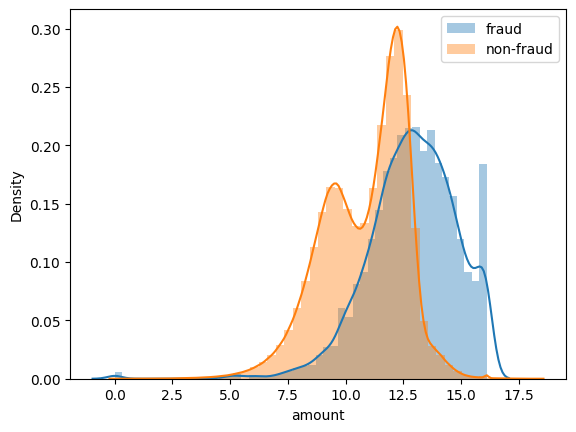

In [18]:

plt.figure()
fraud_log = np.log1p(fraud['amount'])
sns.distplot(fraud_log, label='fraud',  kde=True)
nonfraud_log = np.log1p(nonfraud['amount'])
sns.distplot(nonfraud_log, label='non-fraud',  kde=True)
plt.legend()

## Target / type

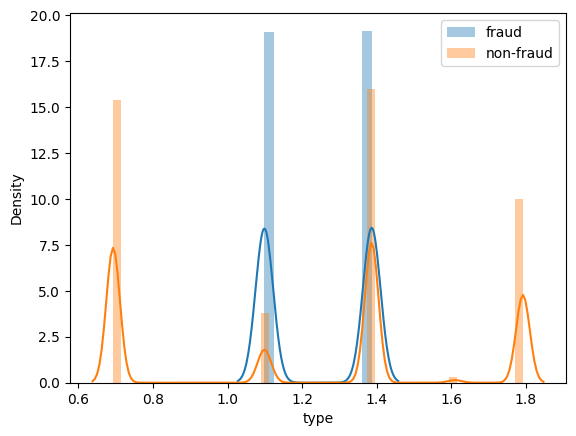

In [19]:

plt.figure()
type = {
    'PAYMENT':1,
    'TRANSFER':2,
    'CASH_OUT':3,
    'DEBIT':4,
    'CASH_IN':5,
    } 
fraud_log = np.log1p(fraud['type'].map(type))
sns.distplot(fraud_log, label='fraud',  kde=True)
nonfraud_log = np.log1p(nonfraud['type'].map(type))
sns.distplot(nonfraud_log, label='non-fraud',  kde=True)
plt.legend()

## Target / step

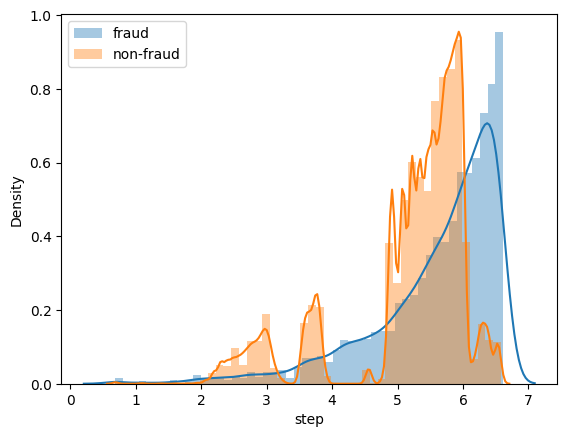

In [20]:
plt.figure()
fraud_log = np.log1p(fraud['step'])
sns.distplot(fraud_log, label='fraud',  kde=True)
nonfraud_log = np.log1p(nonfraud['step'])
sns.distplot(nonfraud_log, label='non-fraud',  kde=True)
plt.legend()

## More Detailed Analysis
### Relationship between variables


### amount / origineBalance 

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

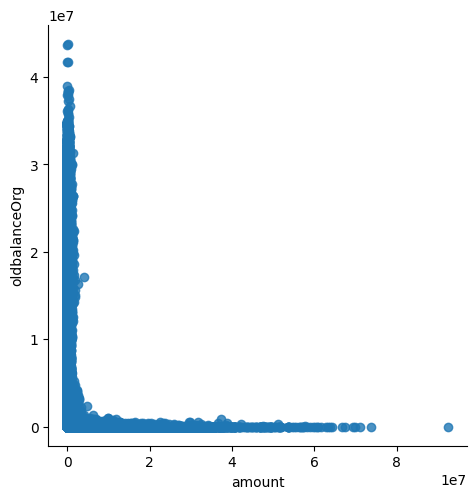

In [21]:
for col in origineBalance_columns:

    plt.figure()
    sns.lmplot(x='amount', y=col, hue='isFraud', data=df)


### amount / destination

<Figure size 640x480 with 0 Axes>

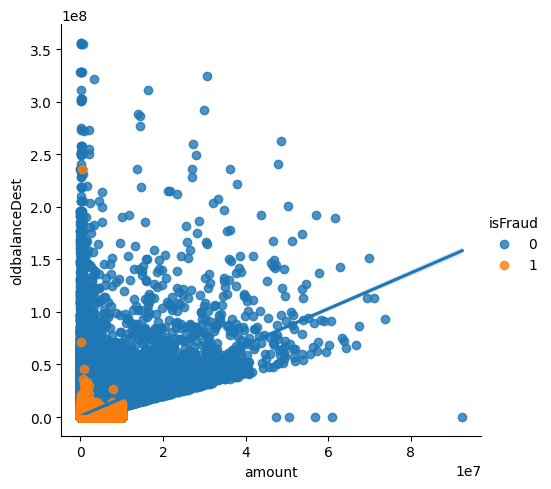

<Figure size 640x480 with 0 Axes>

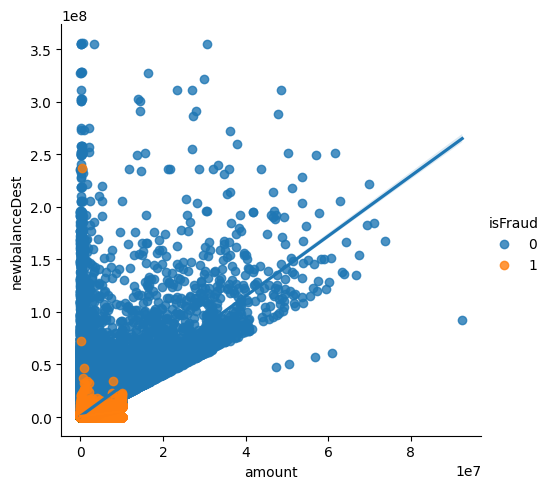

In [ ]:
for col in destinationBalance_columns:

    plt.figure()
    sns.lmplot(x='amount', y=col, hue='isFraud', data=df)